Reference: https://github.com/WillKoehrsen/Machine-Learning-Projects/blob/master/Random%20Forest%20Tutorial.ipynb

In [ ]:
# Import Important Libraries
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing, linear_model # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_recall_fscore_support # 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn import svm



Read CSV building_117_roof_01_door01_modified.csv

In [ ]:
#Reading CSV File, Building_01, which is actually building_0000 
#df = pd.read_csv('building_117_roof_01_door01_modified.csv', header=0, names = ['X','Y','Z','Point_Source_ID','Scan_Angle_Rank','Flightline_Edge','Scan_Direction','Number_of_Returns','Return_Number','Time','Intensity','Classification','Type'])
df = pd.read_csv('building_117_roof_01_door01_modified.csv').drop("R",axis=1).drop("G",axis=1).drop("B",axis=1).drop("Point_Source_ID",axis=1) 
#df = pd.read_csv('building_117_roof_01_door01_modified.csv', header=0, names = ['X','Y','Z','Scan_Angle_Rank','Flightline_Edge','Scan_Direction','Number_of_Returns','Return_Number','Time','Intensity','Classification','Type'])
#df1 = df.dropna() 
#df2 = df1.values
df.info()
print(df)
print(df.shape)
#print(df2[:, 14])
from sklearn.utils import resample 
df_majority = df[df.Type == 'roof']
df_minority = df[df.Type == 'door'] 

#print(df_majority)
#downsampling majority class 

df_majority_downsampled = resample(df_majority, replace = False, n_samples = 7000, random_state=123)
#df_minority_downsampled = resample(df_minority, replace = False, n_samples = 7000, random_state=123)
df_minority_upsampled = resample(df_minority, replace = True, n_samples = 7000, random_state=123)
#df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_downsampled = pd.concat([df_majority_downsampled, df_minority_upsampled])

#display class counts 
df_downsampled.Type.value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17877 entries, 0 to 17876
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  17877 non-null  float64
 1   Y                  17877 non-null  float64
 2   Z                  17877 non-null  float64
 3   Scan_Angle_Rank    17877 non-null  int64  
 4   Flightline_Edge    17877 non-null  int64  
 5   Scan_Direction     17877 non-null  int64  
 6   Number_of_Returns  17877 non-null  int64  
 7   Return_Number      17877 non-null  int64  
 8   Time               17877 non-null  float64
 9   Intensity          17877 non-null  int64  
 10  Classification     17877 non-null  int64  
 11  Type               17877 non-null  object 
dtypes: float64(4), int64(7), object(1)
memory usage: 1.6+ MB
                 X            Y          Z  Scan_Angle_Rank  Flightline_Edge  \
0      315996.7480  234680.7109  16.320000              -17                0 

door    7000
roof    7000
Name: Type, dtype: int64

Apply downsampled column to new dataset 

In [ ]:
#with downsampling, and normalization
xOld = df_downsampled.drop('Type', axis = 1)
#print(x)
y = df_downsampled.Type
#print(y)
#print(x.shape,y.shape)
#print(y.shape)

scaler = preprocessing.StandardScaler().fit(xOld)
scaler.mean_
scaler.scale_
x = scaler.transform(xOld)

x.mean(axis = 0)
x.std(axis=0)

#print(x.shape)

array([1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.])

Train Test Split    

In [ ]:
#Train/Test Split
x_scaled = preprocessing.scale(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, train_size = 0.75)

#print(x_train)
#Making sure that 
y_train=y_train.astype('str')
y_test = y_test.astype('str')
print(x_train.shape, x_test.shape)
#print(y_train)

(10500, 11) (3500, 11)


Read CSV #2 - building_02_roof_doors.csv

In [ ]:
#Reading CSV File #2, Building_0000001 txt 
#df_a =  pd.read_csv('building_02_roof_doors.csv',sep = ',',header = 0,names = ['X','Y','Z','Point_Source_ID','Scan_Angle_Rank','Flightline_Edge','Scan_Direction','Number_of_Returns','Return_Number','Time','Intensity','Classification','Type'])
df_a =  pd.read_csv('building_02_roof_doors.csv',sep = ',').drop("R",axis=1).drop("G",axis=1).drop("B",axis=1).drop("Point_Source_ID",axis=1) #,header = 0,names = ['X','Y','Z','Scan_Angle_Rank','Flightline_Edge','Scan_Direction','Number_of_Returns','Return_Number','Time','Intensity','Classification','Type'])
df_a1 = df_a.dropna() 
df_a2 = df_a1.values
#print(df_a)
df_a.info()
#print(df_a['Z'])
'''
#Reading CSV File #2, Building_0000001 txt 
df_b = pd.read_csv('Buildings_000002.txt',sep = ' ')
df_b1 = df_b.dropna() 
df_b2 = df_b1.values
'''

#Normalizing two other data sets
#For building 000001
x1Old = df_a2[:, :11] 
y1 = df_a2[:, 11] 

scaler = preprocessing.StandardScaler().fit(x1Old)
x1 = scaler.transform(x1Old)

print(x1)
'''
#For building 000002
x2Old = df_b2[:, :14] 
y2 = df_b2[:, 14] 

scaler = preprocessing.StandardScaler().fit(x2Old)
x2 = scaler.transform(x2Old)
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58375 entries, 0 to 58374
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  58375 non-null  float64
 1   Y                  58375 non-null  float64
 2   Z                  58375 non-null  float64
 3   Scan_Angle_Rank    58375 non-null  int64  
 4   Flightline_Edge    58375 non-null  int64  
 5   Scan_Direction     58375 non-null  int64  
 6   Number_of_Returns  58375 non-null  int64  
 7   Return_Number      58375 non-null  int64  
 8   Time               58375 non-null  float64
 9   Intensity          58375 non-null  int64  
 10  Classification     58375 non-null  int64  
 11  Type               58375 non-null  object 
dtypes: float64(4), int64(7), object(1)
memory usage: 5.3+ MB
[[-2.29988919e+00  2.63257620e-01 -2.03847012e-01 ... -1.07808091e+00
  -8.41637894e-01  3.28163880e+00]
 [-2.27777570e+00  2.87706151e-01 -2.39301338e-01 ..

'\n#For building 000002\nx2Old = df_b2[:, :14] \ny2 = df_b2[:, 14] \n\nscaler = preprocessing.StandardScaler().fit(x2Old)\nx2 = scaler.transform(x2Old)\n'

Grid Search for tuning hyperparmeters

In [ ]:
#Random Forest Optimization 
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier()

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 3, 
                        n_iter = 10, verbose = 1)

# Fit 
rs.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                                           10, 10, 10, 

In [ ]:
rs.best_params_
best_model = rs.best_estimator_
print(best_model)

RandomForestClassifier(bootstrap=False, max_depth=7,
                       max_features=0.8999999999999999, max_leaf_nodes=28,
                       min_samples_split=10, n_estimators=48)


['door' 'door' 'roof' ... 'door' 'door' 'roof']
[0. 0. 1. ... 0. 0. 1.]
1.0
Feature Importance: [0.         0.42081127 0.56778299 0.01140574 0.         0.
 0.         0.         0.         0.         0.        ]


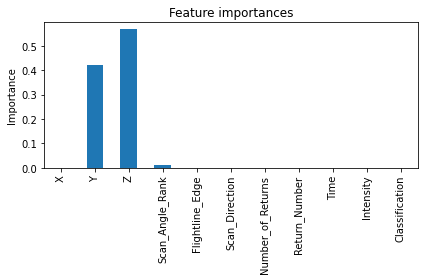

In [ ]:
best_model_train_rf_predictions = best_model.predict(x_train)
best_model_train_rf_probs = best_model.predict_proba(x_train)[:, 1]

best_model_test_rf_predictions = best_model.predict(x_test)
best_model_test_rf_probs = best_model.predict_proba(x_test)[:, 1]
print(best_model_test_rf_predictions)
print(best_model_test_rf_probs)

best_model_roc_value = roc_auc_score(y_test, best_model_test_rf_probs)
print(best_model_roc_value)

importances = best_model.feature_importances_
print("Feature Importance:",importances)

std = np.std([
    best_model.feature_importances_ for tree in best_model.estimators_], axis=0)

feature_names = ['X','Y','Z','Scan_Angle_Rank','Flightline_Edge','Scan_Direction','Number_of_Returns','Return_Number','Time','Intensity','Classification']
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Importance")
fig.tight_layout()

Manual RF

In [ ]:
#Manual RF
forest = RandomForestClassifier(n_estimators=2)
forest.fit(x_train, y_train)

train_rf_predictions = forest.predict(x_train)
train_rf_probs = forest.predict_proba(x_train)[:, 1]

test_rf_predictions = forest.predict(x_test)
test_rf_probs = forest.predict_proba(x_test)[:, 1]
print(test_rf_predictions)
print(test_rf_probs)

# Calculate roc auc, area under the curve 
roc_value = roc_auc_score(y_test, test_rf_probs)
print(roc_value)

['door' 'door' 'roof' ... 'door' 'door' 'roof']
[0. 0. 1. ... 0. 0. 1.]
1.0


In [ ]:
'''
#Manual Checking
num_nodes = [] 
max_depth = []
for ind in forest.estimators_: 
    num_nodes.append(ind.tree_.node_count)
    max_depth.append(ind.tree_.max_depth)
#print('Total Tree Nodes:',sum(num_nodes))
#print('Tree Depth:',max(max_depth))

#Best Model 
best_model_num_nodes = [] 
best_model_max_depth = []
for ind in forest.estimators_: 
    best_model_num_nodes.append(ind.tree_.node_count)
    best_model_max_depth.append(ind.tree_.max_depth)
print('Best Model Total Tree Nodes:',sum(best_model_num_nodes))
print('Best Model Tree Depth:',max(best_model_max_depth))
'''

"\n#Manual Checking\nnum_nodes = [] \nmax_depth = []\nfor ind in forest.estimators_: \n    num_nodes.append(ind.tree_.node_count)\n    max_depth.append(ind.tree_.max_depth)\n#print('Total Tree Nodes:',sum(num_nodes))\n#print('Tree Depth:',max(max_depth))\n\n#Best Model \nbest_model_num_nodes = [] \nbest_model_max_depth = []\nfor ind in forest.estimators_: \n    best_model_num_nodes.append(ind.tree_.node_count)\n    best_model_max_depth.append(ind.tree_.max_depth)\nprint('Best Model Total Tree Nodes:',sum(best_model_num_nodes))\nprint('Best Model Tree Depth:',max(best_model_max_depth))\n"

Confusion Matrix for Best Model

Confusion matrix, without normalization
[[  739     0]
 [33174 24462]]
Normalized confusion matrix
[[1.   0.  ]
 [0.58 0.42]]


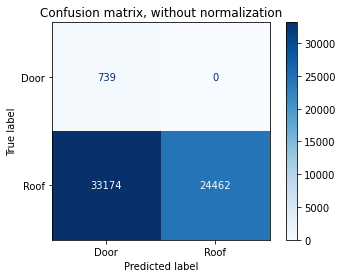

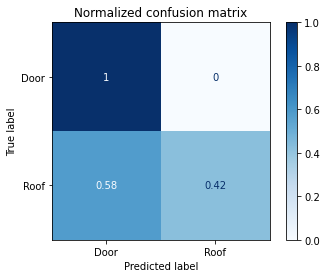

In [ ]:
#Confusion Matrix - Random Forest (best model)

np.set_printoptions(precision=2)
class_names = ['Door','Roof']
classifier = best_model 

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x1, y1,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=22ec9222-3a33-4967-8b6b-eec8dcc0f029' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>